# Medical Cost Data Analysis|

## Data Fetching

In [338]:
import pandas as pd
import numpy as np
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

In [339]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [341]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [342]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [343]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [344]:
df.duplicated().sum()

np.int64(1)

In [372]:
df['children'].mode()

0    0
Name: children, dtype: int64

## Data Cleaning

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [346]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [348]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [349]:
df.drop_duplicates(inplace=True)

## Encoding possible non-numeric data

In [350]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [351]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['sex','region']]).toarray()
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(), index=df.index)

encoded_df.head()

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0


In [352]:
df = pd.concat([df.drop(columns=['sex','region']), encoded_df], axis=1)
df.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,1,no,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,no,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,no,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,no,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0


In [353]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [354]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [355]:
yes_no_map = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(yes_no_map)
df['smoker'].value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   smoker            1337 non-null   int64  
 4   charges           1337 non-null   float64
 5   sex_female        1337 non-null   float64
 6   sex_male          1337 non-null   float64
 7   region_northeast  1337 non-null   float64
 8   region_northwest  1337 non-null   float64
 9   region_southeast  1337 non-null   float64
 10  region_southwest  1337 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 125.3 KB


In [357]:
df.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0


## Data visualization 

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette = ["#00c2c7","#1a1a1a","#4d4d4d", "#6fffc1"]
sns.set_palette(custom_palette)

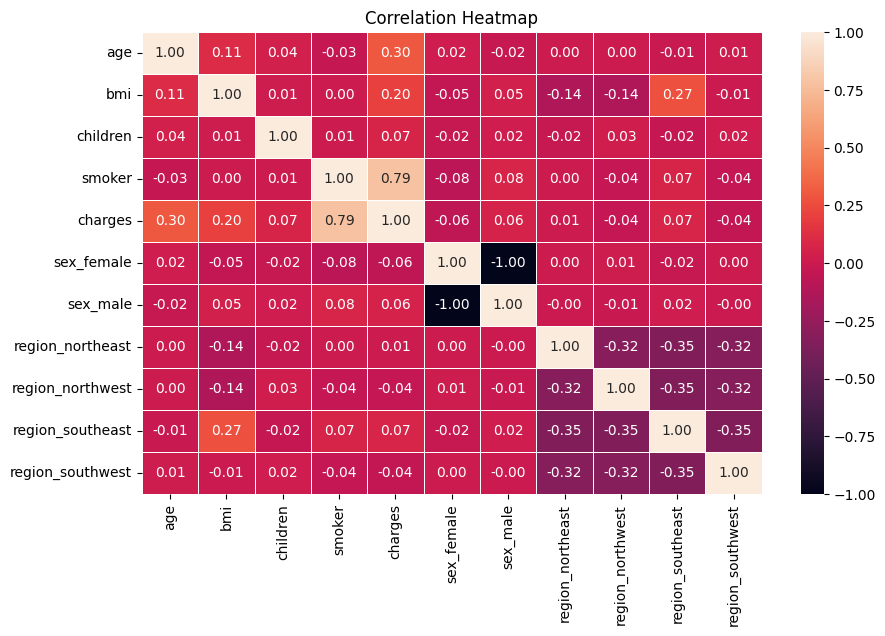

In [359]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

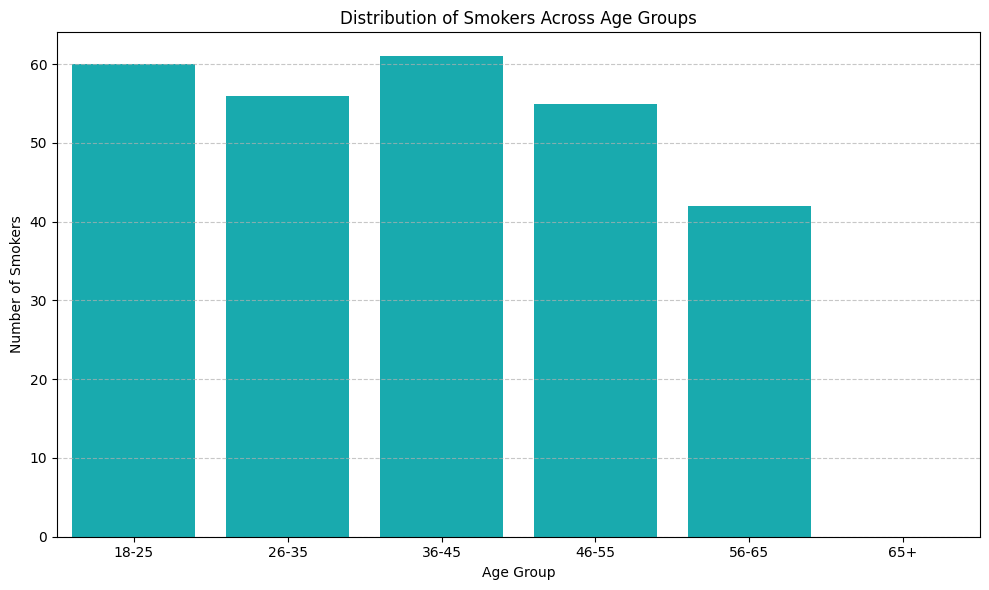

In [360]:
# Age vs. Smoker
# take out smoker == 1
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Categorize ages into bins
age_groups = pd.cut(smokers, bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x=age_groups)

plt.title("Distribution of Smokers Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Smokers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Insurance Charges')

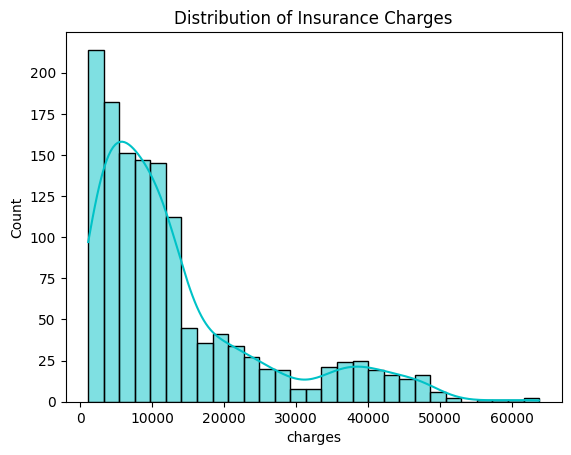

In [361]:
# Distribution of Charges
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")

Text(0.5, 1.0, 'Insurance Charges by Smoking Status')

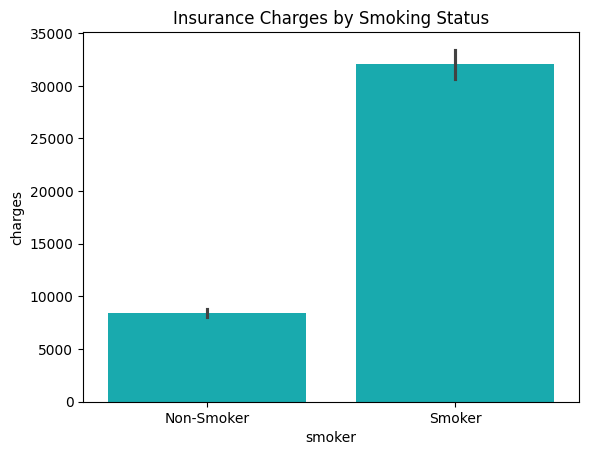

In [362]:
# Smoker vs. Charges
sns.barplot(data=df, x='smoker', y='charges')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.title("Insurance Charges by Smoking Status")

Text(0.5, 1.0, 'BMI vs Charges (Colored by Smoker)')

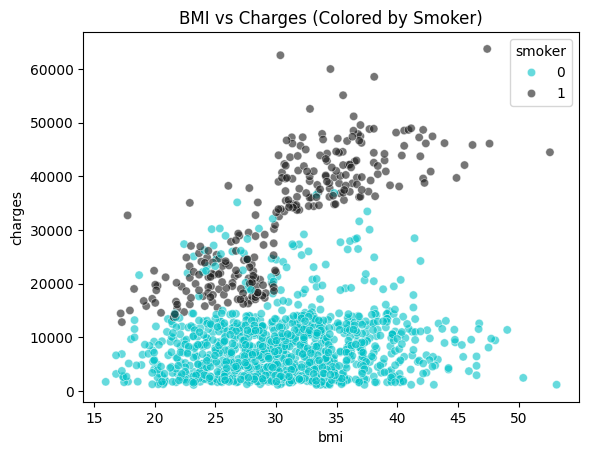

In [363]:
# BMI vs. Charges (Colored by Smoker)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title("BMI vs Charges (Colored by Smoker)")

Text(0.5, 1.0, 'age vs Charges (Colored by Smoker)')

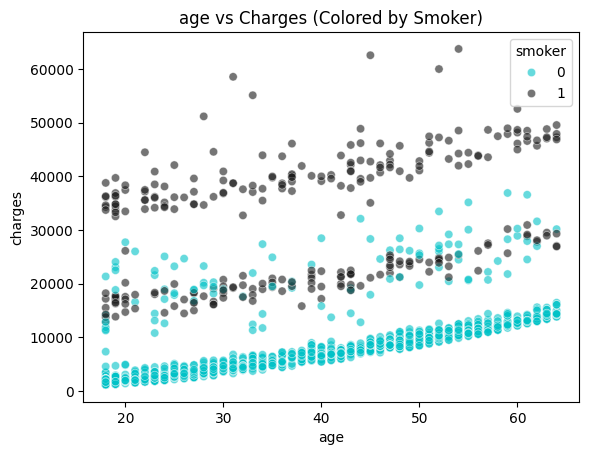

In [364]:

sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.6)
plt.title("age vs Charges (Colored by Smoker)")

Text(0.5, 1.0, 'Average Charges by Sex')

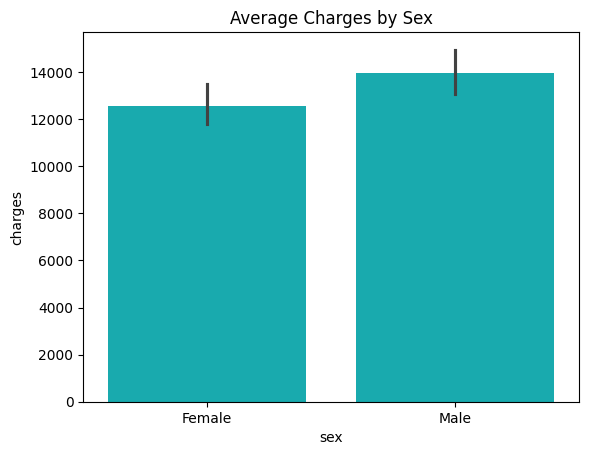

In [365]:
#  Sex vs. Average Charges
df['sex'] = df['sex_female'].apply(lambda x: 'Female' if x == 1 else 'Male')
sns.barplot(data=df, x='sex', y='charges', estimator='mean')
plt.title("Average Charges by Sex")

Text(0.5, 1.0, 'Average Insurance Charges by Region')

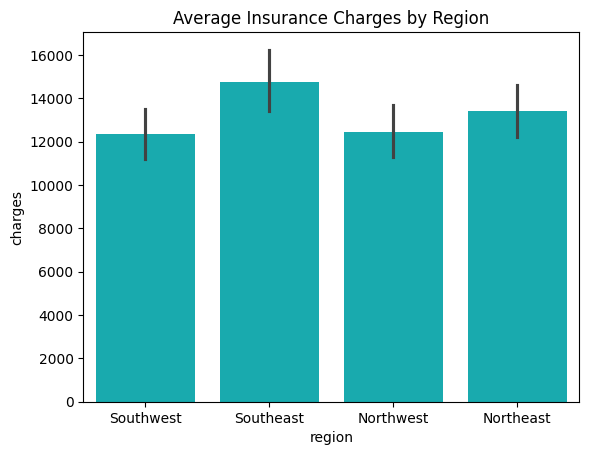

In [366]:
# Region vs. Mean Charges
df['region'] = np.select(
    [df['region_northeast'] == 1, df['region_northwest'] == 1, df['region_southeast'] == 1, df['region_southwest'] == 1],
    ['Northeast', 'Northwest', 'Southeast', 'Southwest'],
    default='Unknown'
)

sns.barplot(data=df, x='region', y='charges', estimator='mean')
plt.title("Average Insurance Charges by Region")

<Axes: xlabel='smoker', ylabel='region'>

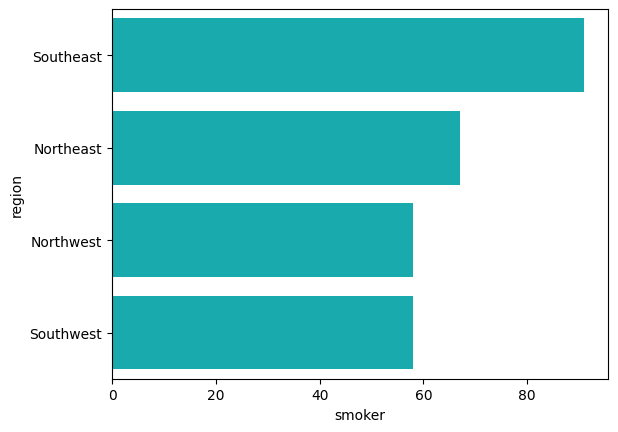

In [396]:
# horizontal bar plot showcasing rank wise smokers in each region
df_region_smoker = df[(df['smoker']==1)].groupby(['region'])['smoker'].sum().sort_values(ascending = False).reset_index()
sns.barplot(orient='h',data=df_region_smoker, x='smoker', y='region',estimator='mean')

In [397]:
df_region_smoker

,region,smoker
0,Southeast,91
1,Northeast,67
2,Northwest,58
3,Southwest,58


<Axes: xlabel='region', ylabel='bmi'>

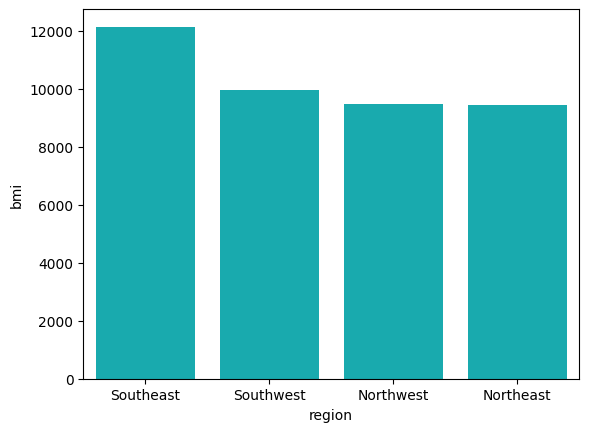

In [ ]:
df_region_bmi = df.groupby(['region'])['bmi'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data=df_region_bmi, x='region', y='bmi', estimator='mean')

<Axes: xlabel='age', ylabel='bmi'>

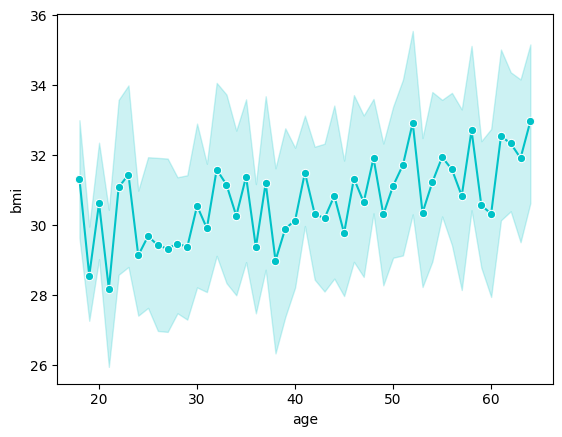

In [ ]:
sns.lineplot(data=df, x='age', y='bmi', marker='o',markers=True, dashes=False)